In [1]:
import os
from datetime import datetime
# Make logging folder named according to current time
start_time_str = datetime.today().strftime('%d_%m_%Y__%H_%M_%S')
log_dir = './logs/'f"log_{start_time_str}"
os.makedirs(log_dir)

# Initialize logger that adds to text file in current logging folder
from logging_utils import *

init_logger(save_dir=log_dir)
logger = get_logger()




In [2]:
import numpy as np
# A = np.matrix(
#     [[1, 1], 
#      [3, -4]]
# )

# A = np.matrix(
#     [[1, 1, 4], 
#      [3, -4, 0],
#      [0, 3 , 1]]
# )

A = np.matrix(
    [[-2, 1, 0, 0, 0], 
     [ 1,-2, 1, 0, 0],
     [ 0, 1,-2, 1,0],
     [ 0, 0, 1,-2, 1],
     [ 0, 0, 0, 1,-2]]
)

e = 0
nmax_iter = 10
retrain_freq=1
# x0 = np.array([0, 0])
# x0 = np.array([0,0,0])
x0 = np.array([0,0,0,0,0])

n_steps = 5000
InputDim=5
HiddenDim=8
OutputDim=5

In [3]:
# Initial log message
logger.info("Increased dimension to 5 and normalize NN inputs (To recover solution , solution should be be rescaled). Small network continues to provide good results. Generally the best approach seems to be to select a 'data quality' cutoff related to the error of the early GMRES iterations, and only add data that are above the cutoff. Furthermore, it is key to train frequently when this data is added. After an initial training period, it seems that only a few training iterations are needed later on. This ensures that we do not over fit and not waste training computations.  By normalizing NN inputs, the performance of the small NN continues to be great as expected. NOTE: normalzing the RHS as input to the NN is essential.  ")

2020-05-08 00:50:21 [INFO] <ipython-input-3-813fa8b82051> 2 - Increased dimension to 5 and normalize NN inputs (To recover solution , solution should be be rescaled). Small network continues to provide good results. Generally the best approach seems to be to select a 'data quality' cutoff related to the error of the early GMRES iterations, and only add data that are above the cutoff. Furthermore, it is key to train frequently when this data is added. After an initial training period, it seems that only a few training iterations are needed later on. This ensures that we do not over fit and not waste training computations.  By normalizing NN inputs, the performance of the small NN continues to be great as expected. NOTE: normalzing the RHS as input to the NN is essential.  


In [4]:
# Set up parameter class
class MyParamsClass():
    def __init__(self, A,nmax_iter,retrain_freq,e,x0,n_steps,InputDim,HiddenDim,OutputDim):
        self.A = A.tolist()
        self.nmax_iter = nmax_iter
        self.n_steps =n_steps
        self.retrain_freq=retrain_freq
        self.e=e
        self.x0=x0.tolist()
        self.InputDim=InputDim
        self.HiddenDim=HiddenDim
        self.OutputDim=OutputDim

In [5]:
import os
import json

params = MyParamsClass(A,nmax_iter,retrain_freq,e,x0,n_steps,InputDim,HiddenDim,OutputDim)
sorted_params_dict = {k: params.__dict__[k] for k 
                      in sorted(params.__dict__.keys())}

params_filepath = log_dir+'/params.json'
json.dump(sorted_params_dict, open(params_filepath, 'w'), indent=4)

In [6]:
from src_dir import *

In [7]:
@nn_preconditioner(retrain_freq=retrain_freq, debug=True,InputDim=InputDim,HiddenDim=HiddenDim,OutputDim=OutputDim )
def MLGMRES(A, b, x0, e, nmax_iter):
    return GMRES(A, b, x0, e, nmax_iter)
    

In [8]:
Training_Iterations=np.arange(0,n_steps)

Error0=np.zeros((1,n_steps))
Error1=np.zeros((1,n_steps))
Error2=np.zeros((1,n_steps))
Error3=np.zeros((1,n_steps))
Error4=np.zeros((1,n_steps))
Error5=np.zeros((1,n_steps))

Error0_ML=np.zeros((1,n_steps))
Error1_ML=np.zeros((1,n_steps))
Error2_ML=np.zeros((1,n_steps))
Error3_ML=np.zeros((1,n_steps))
Error4_ML=np.zeros((1,n_steps))

In [9]:
for ProbIdx in range(n_steps):
    b =12*np.squeeze(np.random.randn(1,5))  #random b
    b_norm=np.linalg.norm(b)
    Out=MLGMRES(A, b/b_norm, x0, e, nmax_iter)  # normalize b for optimal NN performance
    Error0_ML[:,ProbIdx]=np.linalg.norm(np.dot(A,Out[0])-b/b_norm) # Error ML Iteration 1
    Error1_ML[:,ProbIdx]=np.linalg.norm(np.dot(A,Out[1])-b/b_norm) # Error ML Iteration 2
    Error2_ML[:,ProbIdx]=np.linalg.norm(np.dot(A,Out[2])-b/b_norm) # Error ML Iteration 3
    Error3_ML[:,ProbIdx]=np.linalg.norm(np.dot(A,Out[3])-b/b_norm) # Error ML Iteration 4
    Error4_ML[:,ProbIdx]=np.linalg.norm(np.dot(A,Out[4])-b/b_norm) # Error ML Iteration 5

    NonML_Out=GMRES(A, b/b_norm, x0, e, nmax_iter)
    Error0[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[0])-b/b_norm) # Error GMRES Iteration 1
    Error1[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[1])-b/b_norm) # Error GMRES Iteration 2
    Error2[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[2])-b/b_norm) # Error GMRES Iteration 3
    Error3[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[3])-b/b_norm) # Error GMRES Iteration 4
    Error4[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[4])-b/b_norm) # Error GMRES Iteration 5
    Error5[:,ProbIdx]=np.linalg.norm(np.dot(A,NonML_Out[5])-b/b_norm) # Error GMRES Iteration 5
    print(ProbIdx)


1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202

In [10]:
print(np.mean(Error0_ML))
print(np.mean(Error1_ML))
print(np.mean(Error2_ML))
print(np.mean(Error3_ML))
print(np.mean(Error4_ML))

print('')

print(np.mean(Error0))
print(np.mean(Error1))
print(np.mean(Error2))
print(np.mean(Error3))
print(np.mean(Error4))
# print(np.mean(Error5))


1.7259504174020317
0.13450665548695737
0.06378378112965842
0.028202807537001343
0.0123777243954123

3.1962684309040807
0.4782697930815988
0.28740698679204163
0.16573047171095004
0.07425798208510871


In [11]:
import matplotlib.pyplot as pp

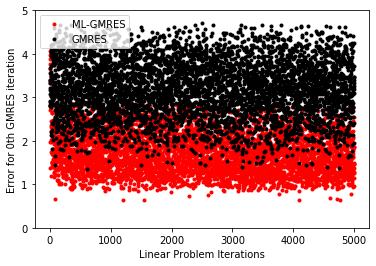

In [12]:
pp.plot(Training_Iterations,np.squeeze(Error0_ML),'.r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error0),'.k',label='GMRES')
pp.ylabel('Error for 0th GMRES iteration')
pp.xlabel('Linear Problem Iterations')
pp.legend(loc="upper left")
pp.savefig(log_dir+'/Iter0.png')
pp.ylim((0, 5)) 
pp.show()

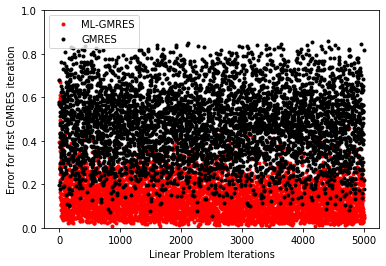

In [13]:
pp.plot(Training_Iterations,np.squeeze(Error1_ML),'.r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error1),'.k',label='GMRES')
pp.ylabel('Error for first GMRES iteration')
pp.legend(loc="upper left")
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter1.png')
pp.ylim((0, 1)) 
pp.show()

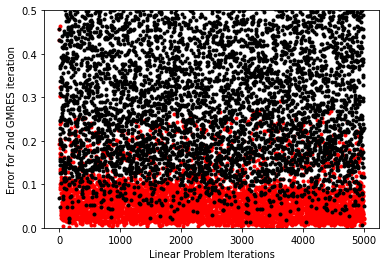

In [14]:
pp.plot(Training_Iterations,np.squeeze(Error2_ML),'.r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error2),'.k',label='GMRES')
pp.ylabel('Error for 2nd GMRES iteration')
pp.xlabel('Linear Problem Iterations')
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter2.png')
pp.ylim((0, .5)) 

pp.show()

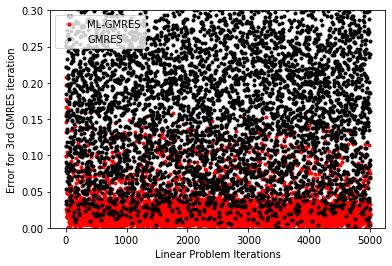

In [15]:
pp.plot(Training_Iterations,np.squeeze(Error3_ML),'.r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error3),'.k',label='GMRES')
pp.ylabel('Error for 3rd GMRES iteration')
pp.ylim((0, 0.3)) 
pp.legend(loc="upper left")
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter3_zoom.png')
pp.show()

In [16]:
# logger.info("Further checking overfitting situation. Results look good even with large problem iteration count. It seems best to train often initially to avoid overfitting, and then filter out potential data if current model prediction is within tolerance. It seems vital to avoid adding repetive data to training set. This initial frequent training to avoid overfitting due to repetitive data seems to be a feature of the fact the problem is extremely simple.")

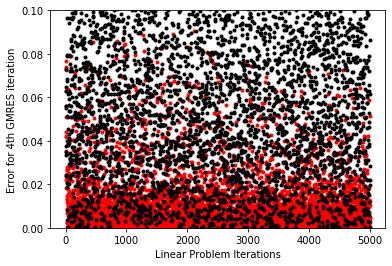

In [17]:
pp.plot(Training_Iterations,np.squeeze(Error4_ML),'.r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error4),'.k',label='GMRES')
pp.ylabel('Error for 4th GMRES iteration')
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter4.png')
pp.ylim((0, 0.1)) 

pp.show()